In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
import pandas as pd
from sklearn import tree



In [2]:
df=pd.read_csv("/content/archive (6).csv")
df.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            6.7              0.58         0.08             1.8      0.097   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 15.0                  65.0   0.9959  3.28       0.54   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4  
5      9.4        5   5  
6      9.4        5   6  
7     10.0        7   7  
8      9.5        7   8  
9      9.2        5  10

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [5]:
df.drop(columns = ['Id'], inplace = True)

In [6]:
df.shape

(1143, 12)

In [7]:
def summary(df):
    sum = pd.DataFrame(df.dtypes, columns=['dtypes'])
    sum['missing#'] = df.isna().sum().values*100
    sum['missing%'] = (df.isna().sum().values*100)/len(df)
    sum['uniques'] = df.nunique().values
    sum['count'] = df.count().values
    sum['skew'] = df.skew().values
    desc = pd.DataFrame(df.describe().T)
    sum['min'] = desc['min']
    sum['max'] = desc['max']
    sum['mean'] = desc['mean']
    return sum

summary(df).style.background_gradient(cmap='twilight_shifted_r')

In [8]:
df['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [9]:
x = df.drop(columns = ['quality'], axis = 1)
y = df['quality']

In [10]:
from imblearn.combine import SMOTETomek
smt=SMOTETomek()
x,y=smt.fit_resample(x,y)

In [11]:
x.shape

(2712, 11)

In [12]:
y.shape

(2712,)

In [13]:
y.value_counts()

3    477
8    468
7    467
4    460
6    421
5    419
Name: quality, dtype: int64

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 40)

In [15]:
knn = KNeighborsClassifier()
lr = LogisticRegression()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()

In [16]:
knn.fit(x_train, y_train)
lr.fit(x_train, y_train)
rf.fit(x_train, y_train)
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [17]:
def acc_report(actual,predicted):
    acc_score=accuracy_score(actual,predicted)
    cm_matrix=confusion_matrix(actual,predicted)
    class_rep=classification_report(actual,predicted)
    print('the accuracy of tha model is ',acc_score)
    print(cm_matrix)
    print(class_rep)

In [18]:
ptrdt = dt.predict(x_train)#preduct data tha by help of decision tree
ptedt = dt.predict(x_test)
print(acc_report(y_train, ptrdt))
print(acc_report(y_test, ptedt))

the accuracy of tha model is  1.0
[[373   0   0   0   0   0]
 [  0 373   0   0   0   0]
 [  0   0 336   0   0   0]
 [  0   0   0 332   0   0]
 [  0   0   0   0 369   0]
 [  0   0   0   0   0 386]]
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       373
           4       1.00      1.00      1.00       373
           5       1.00      1.00      1.00       336
           6       1.00      1.00      1.00       332
           7       1.00      1.00      1.00       369
           8       1.00      1.00      1.00       386

    accuracy                           1.00      2169
   macro avg       1.00      1.00      1.00      2169
weighted avg       1.00      1.00      1.00      2169

None
the accuracy of tha model is  0.8121546961325967
[[100   1   3   0   0   0]
 [  2  77   6   2   0   0]
 [  3   7  50  22   1   0]
 [  1   4  18  55   9   2]
 [  0   1   2   8  78   9]
 [  0   0   0   0   1  81]]
              precision    recall  f1-score

In [19]:
ptrrf = rf.predict(x_train)#predict tha data by help of random forest
pterf = rf.predict(x_test)
print(acc_report(y_train, ptrrf))
print(acc_report(y_test, pterf))

the accuracy of tha model is  1.0
[[373   0   0   0   0   0]
 [  0 373   0   0   0   0]
 [  0   0 336   0   0   0]
 [  0   0   0 332   0   0]
 [  0   0   0   0 369   0]
 [  0   0   0   0   0 386]]
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       373
           4       1.00      1.00      1.00       373
           5       1.00      1.00      1.00       336
           6       1.00      1.00      1.00       332
           7       1.00      1.00      1.00       369
           8       1.00      1.00      1.00       386

    accuracy                           1.00      2169
   macro avg       1.00      1.00      1.00      2169
weighted avg       1.00      1.00      1.00      2169

None
the accuracy of tha model is  0.861878453038674
[[104   0   0   0   0   0]
 [  0  84   2   1   0   0]
 [  4   5  53  20   1   0]
 [  0   3  11  61  13   1]
 [  0   0   1   8  85   4]
 [  0   0   0   0   1  81]]
              precision    recall  f1-score 

In [20]:
ptrknn = knn.predict(x_train)#predict tha data by help of k-nearest neighbors
pteknn = knn.predict(x_test)
print(acc_report(y_train, ptrknn))
print(acc_report(y_test, pteknn))

the accuracy of tha model is  0.7952973720608575
[[359   6   0   6   2   0]
 [ 10 343   9   4   6   1]
 [ 26  50 196  32  17  15]
 [ 31  48  50 138  37  28]
 [  4   4   8  12 331  10]
 [  1   4   2   6  15 358]]
              precision    recall  f1-score   support

           3       0.83      0.96      0.89       373
           4       0.75      0.92      0.83       373
           5       0.74      0.58      0.65       336
           6       0.70      0.42      0.52       332
           7       0.81      0.90      0.85       369
           8       0.87      0.93      0.90       386

    accuracy                           0.80      2169
   macro avg       0.78      0.78      0.77      2169
weighted avg       0.79      0.80      0.78      2169

None
the accuracy of tha model is  0.7108655616942909
[[98  4  0  2  0  0]
 [ 6 74  2  3  0  2]
 [18  8 37 13  5  2]
 [14  6 14 23 21 11]
 [ 1  2  2  5 80  8]
 [ 0  0  2  4  2 74]]
              precision    recall  f1-score   support

         

In [21]:
ptrlr = lr.predict(x_train)#predict tha data by help of logistic regression
ptelr = lr.predict(x_test)
print(acc_report(y_train, ptrlr))
print(acc_report(y_test, ptelr))

the accuracy of tha model is  0.5440295066851083
[[323  50   0   0   0   0]
 [ 54 186  83  31  13   6]
 [ 36  79 140  57  12  12]
 [ 13  69  39 107  51  53]
 [  8  18   3  55 138 147]
 [  0   0   0   4  96 286]]
              precision    recall  f1-score   support

           3       0.74      0.87      0.80       373
           4       0.46      0.50      0.48       373
           5       0.53      0.42      0.47       336
           6       0.42      0.32      0.37       332
           7       0.45      0.37      0.41       369
           8       0.57      0.74      0.64       386

    accuracy                           0.54      2169
   macro avg       0.53      0.54      0.53      2169
weighted avg       0.53      0.54      0.53      2169

None
the accuracy of tha model is  0.5322283609576427
[[90 14  0  0  0  0]
 [ 9 46 21  7  3  1]
 [11 16 30 20  6  0]
 [ 3 16  7 26 22 15]
 [ 4  2  3 13 37 39]
 [ 0  0  0  0 22 60]]
              precision    recall  f1-score   support

         

In [22]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

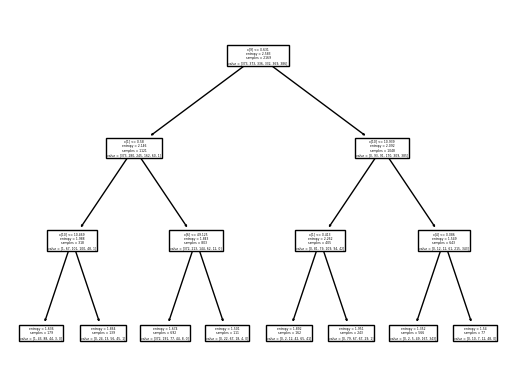

In [23]:
tree.plot_tree(model);

In [35]:
fn=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
cn=['7', '3', '8','4','6','5']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=600)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);